All the credit for this source of data comes from sports-reference.com ([sports-reference](https://www.sports-reference.com/cfb/)

Specifically, the data will come from the game logs section for each of the 10 Big 12 Football Teams from the 2012 through the 2022 Seasons.


The tables we will be scrapping are of the below form

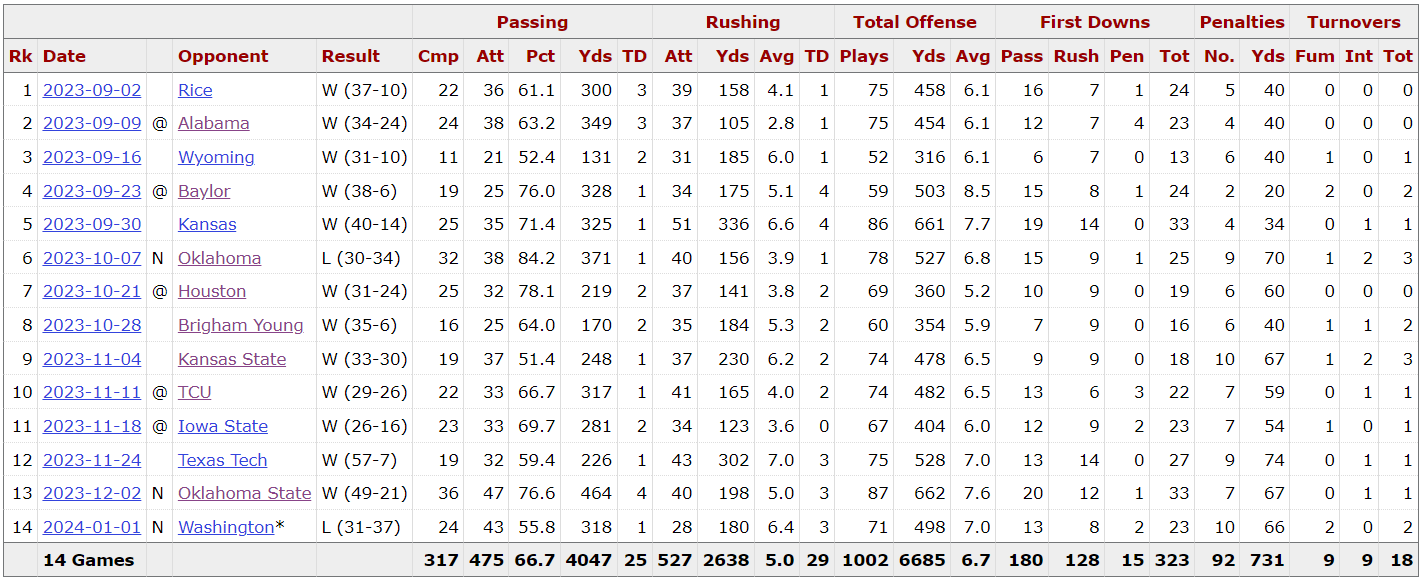

In [19]:
import pandas as pd
import time

# Dictionary each team link name along with a cleaner name
team_data = {
    'texas': 'Texas',
    'oklahoma': 'Oklahoma',
    'oklahoma-state': 'Oklahoma State',
    'kansas-state': 'Kansas State',
    'west-virginia': 'West Virginia',
    'iowa-state': 'Iowa State',
    'kansas': 'Kansas',
    'texas-tech': 'Texas Tech',
    'texas-christian': 'TCU',
    'baylor': 'Baylor'
}

# Creating an empty dataframe
tot = pd.DataFrame()

# Loop through each team and year to retrieve game logs
for link, team in team_data.items():
  for year in range(2012, 2023):
    time.sleep(2) # Two second break to avoid overloading server
    # Read HTML table with specific team's link and year
    games = pd.read_html(f'https://www.sports-reference.com/cfb/schools/{link}/{year}/gamelog/', attrs={'id': 'offense'})[0]
    # Adding a 'Team' column to identify the team
    games['Team'] = team
    # Combing the new games DataFrame with the total (tot) games DataFrame
    tot = pd.concat([tot, games])
    # Printing each year and team name to track progress and identify potential errors
    print(f'Year: {year}, Team: {team}')

Year: 2012, Team: Texas
Year: 2013, Team: Texas
Year: 2014, Team: Texas
Year: 2015, Team: Texas
Year: 2016, Team: Texas
Year: 2017, Team: Texas
Year: 2018, Team: Texas
Year: 2019, Team: Texas
Year: 2020, Team: Texas
Year: 2021, Team: Texas
Year: 2022, Team: Texas
Year: 2012, Team: Oklahoma
Year: 2013, Team: Oklahoma
Year: 2014, Team: Oklahoma
Year: 2015, Team: Oklahoma
Year: 2016, Team: Oklahoma
Year: 2017, Team: Oklahoma
Year: 2018, Team: Oklahoma
Year: 2019, Team: Oklahoma
Year: 2020, Team: Oklahoma
Year: 2021, Team: Oklahoma
Year: 2022, Team: Oklahoma
Year: 2012, Team: Oklahoma State
Year: 2013, Team: Oklahoma State
Year: 2014, Team: Oklahoma State
Year: 2015, Team: Oklahoma State
Year: 2016, Team: Oklahoma State
Year: 2017, Team: Oklahoma State
Year: 2018, Team: Oklahoma State
Year: 2019, Team: Oklahoma State
Year: 2020, Team: Oklahoma State
Year: 2021, Team: Oklahoma State
Year: 2022, Team: Oklahoma State
Year: 2012, Team: Kansas State
Year: 2013, Team: Kansas State
Year: 2014, Te

In [17]:
# Initially printing DataFrame
tot

,Unnamed: 0_level_0_Rk,Unnamed: 1_level_0_Date,Unnamed: 2_level_0_Unnamed: 2_level_1,Unnamed: 3_level_0_Opponent,Unnamed: 4_level_0_Result,Passing_Cmp,Passing_Att,Passing_Pct,Passing_Yds,Passing_TD,...,First Downs_Pass,First Downs_Rush,First Downs_Pen,First Downs_Tot,Penalties_No.,Penalties_Yds,Turnovers_Fum,Turnovers_Int,Turnovers_Tot,Team_
0,1.0,2012-09-01,NaN,Wyoming,W (37-17),20,28,71.4,156,1,...,8,13,1,22,3,35,1,0,1,Texas
1,2.0,2012-09-08,NaN,New Mexico,W (45-0),21,30,70.0,285,3,...,14,6,0,20,3,20,0,0,0,Texas
2,3.0,2012-09-15,@,Mississippi,W (66-31),19,24,79.2,326,4,...,10,18,1,29,8,55,0,0,0,Texas
3,4.0,2012-09-29,@,Oklahoma State,W (41-36),30,38,78.9,304,3,...,13,9,3,25,5,30,0,1,1,Texas
4,5.0,2012-10-06,NaN,West Virginia,L (45-48),22,29,75.9,269,1,...,12,7,2,21,4,35,1,0,1,Texas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,10.0,2022-11-12,NaN,Kansas State,L (3-31),22,38,57.9,203,0,...,10,6,1,17,6,51,0,2,2,Baylor
10,11.0,2022-11-19,NaN,TCU,L (28-29),21,30,70.0,269,1,...,12,13,0,25,3,14,0,1,1,Baylor
11,12.0,2022-11-25,@,Texas,L (27-38),18,36,50.0,179,2,...,10,8,0,18,1,2,0,1,1,Baylor
12,13.0,2022-12-22,N,Air Force*,L (15-30),11,23,47.8,188,2,...,7,3,1,11,5,27,0,0,0,Baylor


From above output, the row representing the total number of games along with the totals from each numerical column was retrieved. This won't be helpful for us.

In [26]:
# Convert columns to MultiIndex
tot.columns = pd.MultiIndex.from_tuples(tot.columns)
# Smooshing MultiIndex columns into a single level
tot.columns = ['_'.join(col) for col in tot.columns]

# Removing all missing values from the respective column
df1 = tot.dropna(subset=['Unnamed: 0_level_0_Rk'])

The first five columns have ugly headings, so we will rename them

In [27]:
# Renaming columns
df1 = df1.rename(columns={'Unnamed: 0_level_0_Rk': 'Rk',
                          'Unnamed: 1_level_0_Date': 'Date',
                          'Unnamed: 2_level_0_Unnamed: 2_level_1': 'H/A',
                          'Unnamed: 3_level_0_Opponent': 'Opponent',
                          'Unnamed: 4_level_0_Result': 'Result'})

The H/A column is currently structured where an '@' represent an away game, an N represents a game played at a neutral site, and a missing value/null represents a home game.

In [28]:
# Changing '@' entries to 'Away'
df1.loc[df1['H/A'] == '@', 'H/A'] = 'Away'
# Changing missing entries to 'Home'
df1.loc[df1['H/A'].isnull(), 'H/A'] = 'Home'

In [31]:
# Create a new 'W/L' column, marking 'W' for wins and 'L' for losses based on the first character of the 'Result' column
df1['W/L'] = df1['Result'].apply(lambda x: 'W' if x[0] == 'W' else 'L')


In [32]:
# Checking to see if there are any remaining missing values
df1.isnull().sum()

Rk                     0
Date                   0
H/A                    0
Opponent               0
Result                 0
Passing_Cmp            0
Passing_Att            0
Passing_Pct            0
Passing_Yds            0
Passing_TD             0
Rushing_Att            0
Rushing_Yds            0
Rushing_Avg            0
Rushing_TD             0
Total Offense_Plays    0
Total Offense_Yds      0
Total Offense_Avg      0
First Downs_Pass       0
First Downs_Rush       0
First Downs_Pen        0
First Downs_Tot        0
Penalties_No.          0
Penalties_Yds          0
Turnovers_Fum          0
Turnovers_Int          0
Turnovers_Tot          0
Team_                  0
W/L                    0
dtype: int64

In [33]:
# Making sure the dataframe looks good
df1

,Rk,Date,H/A,Opponent,Result,Passing_Cmp,Passing_Att,Passing_Pct,Passing_Yds,Passing_TD,...,First Downs_Rush,First Downs_Pen,First Downs_Tot,Penalties_No.,Penalties_Yds,Turnovers_Fum,Turnovers_Int,Turnovers_Tot,Team_,W/L
0,1.0,2012-09-01,Home,Wyoming,W (37-17),20,28,71.4,156,1,...,13,1,22,3,35,1,0,1,Texas,W
1,2.0,2012-09-08,Home,New Mexico,W (45-0),21,30,70.0,285,3,...,6,0,20,3,20,0,0,0,Texas,W
2,3.0,2012-09-15,Away,Mississippi,W (66-31),19,24,79.2,326,4,...,18,1,29,8,55,0,0,0,Texas,W
3,4.0,2012-09-29,Away,Oklahoma State,W (41-36),30,38,78.9,304,3,...,9,3,25,5,30,0,1,1,Texas,W
4,5.0,2012-10-06,Home,West Virginia,L (45-48),22,29,75.9,269,1,...,7,2,21,4,35,1,0,1,Texas,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,9.0,2022-11-05,Away,Oklahoma,W (38-35),14,23,60.9,132,0,...,14,2,24,6,65,0,1,1,Baylor,W
9,10.0,2022-11-12,Home,Kansas State,L (3-31),22,38,57.9,203,0,...,6,1,17,6,51,0,2,2,Baylor,L
10,11.0,2022-11-19,Home,TCU,L (28-29),21,30,70.0,269,1,...,13,0,25,3,14,0,1,1,Baylor,L
11,12.0,2022-11-25,Away,Texas,L (27-38),18,36,50.0,179,2,...,8,0,18,1,2,0,1,1,Baylor,L


In [34]:
# Exporting columns as csv
df1.to_csv('big12-1222.csv')